# Ridge regression

In [204]:
#importing required depedencies
import numpy as np                  #for numerical calculation
import matplotlib.pyplot as plt     #for data visualization

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')


## Generate sample data for linear equation $$y = mx + c$$

In [212]:
sample_size = 100                                 # Sample size
x = 2*np.random.rand(sample_size,1)               #generate sample data for x                        
y = 4 + 3*x + np.random.rand(sample_size, 1)      #generate sample data for y
x_b = np.c_[np.ones((sample_size,1)), x]          #add bias X0 = 1

x_new = np.array([[0],[2]])                       # making prediction at x_new value
x_new_b = np.c_[np.ones((2,1)), x_new]            # adding bias to x_new val


### Calculate $\hat{\theta}$ for linear data using closed form solution $$\hat{\theta} = (X^T.X)^{-1}.X^T.y$$

In [213]:
n_feature = x_b.shape[1]                                                #number of features
A = np.identity(n_feature)                                              #Create identity matrix of n_feature + 1
A[0,0] = 0                                                              #Placing zero at top-left diagonal position in matrix
def fit_and_plot(alpha, x_b, y):
    
    theta = np.linalg.inv(x_b.T.dot(x_b) + alpha* A).dot(x_b.T).dot(y)   #calculating theta 
    y_predict = x_b.dot(theta)                                       #predict value using theta 
    plt.plot(x, y_predict, 'r-', label=f"alpha :{alpha}")                  #plot predicted value
    plt.scatter(x, y)                                                    #plot scatter plot of give input x, y
    plt.xlabel('x-axis')                                                 #define axis name
    plt.ylabel('y-axis')                                                 #define axis nae
    plt.title(r"$\alpha = $" +f'{alpha}')                                #define plot title
    plt.legend()                                       
    print(f"Regularized term: {alpha} | Final epoch theta: {theta[0], theta[1]}")


Regularized term: 0.01 | Final epoch theta: (array([4.47657169]), array([3.02758333]))
Regularized term: 10 | Final epoch theta: (array([5.22333383]), array([2.3359922]))
Regularized term: 100 | Final epoch theta: (array([6.92082386]), array([0.76391322]))


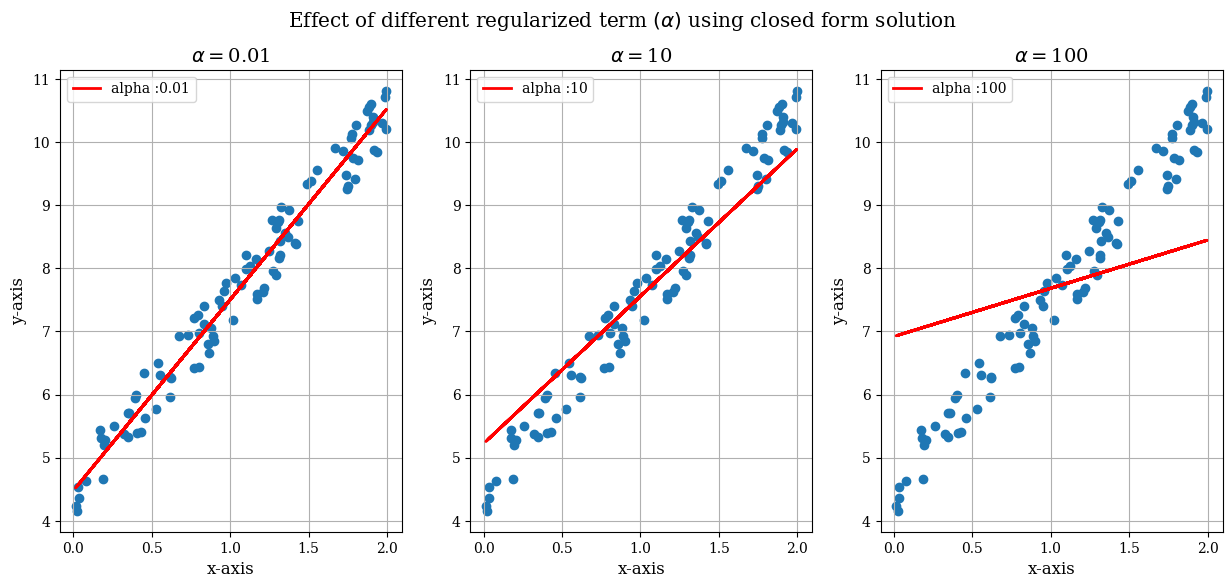

In [214]:
plt.figure(figsize=[15,6])                         #define figure size                      
alpha_list = [0.01, 10, 100]                       #list of different regularized parameter alpha

for i in range(1, 4):                               #visualize ridge regression for differnet alpha value
    plt.subplot(1, 3, i)
    fit_and_plot(alpha_list[i-1], x_b, y)
    plt.grid()
    plt.suptitle(r"Effect of different regularized term $(\alpha)$ using closed form solution")

### Calculate $\theta^{(next~Step)}$ using gradient descent $$J_{(\theta)} = MSE_{(\theta)} + {\alpha}~\frac{1}{2}~\sum_{i=1}^n\theta_{i}^2$$ $$\theta^{(next~Step)} = \theta - \eta~\nabla_{\theta}~J_{(\theta)} + ~{\alpha}\sum_{i = 1}^n\theta_{i}$$

In [215]:
def fit_and_plot(alpha, n_iteration):
    theta = np.random.rand(x_b.shape[1],1)                                                  #Initialize the random theta value
    eta = 0.0001                                                                            # learning rate eta is 0.0001
    for i in range(n_iteration):
        gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y) + alpha * np.sum(theta)   # calculate gradient and add regularization param
        theta -= eta * gradient                                                             # calculate next theta
        y_predict = x_b.dot(theta) 
        if i % 1000 == 0:                                                                   # predict value using new theta
            plt.plot(x, y_predict, label = f"epoch : {i+1}")                                # create plot against predicted value
            plt.scatter(x, y)                                                               # Create plot for input value
            plt.xlabel('x-axis')                                                            # axis name
            plt.ylabel('y-axis')                               
            plt.title(r"$\alpha = $" +f'{alpha}')                                            #define plot title
            plt.legend()                                       
    print(f"Regularized term: {alpha} | Final epoch theta: {theta[0], theta[1]}")
    

        

Regularized term: 0.01 | Final epoch theta: (array([3.64380799]), array([3.60710184]))
Regularized term: 1 | Final epoch theta: (array([2.42172457]), array([2.70126277]))
Regularized term: 10 | Final epoch theta: (array([-0.20942516]), array([1.56411046]))


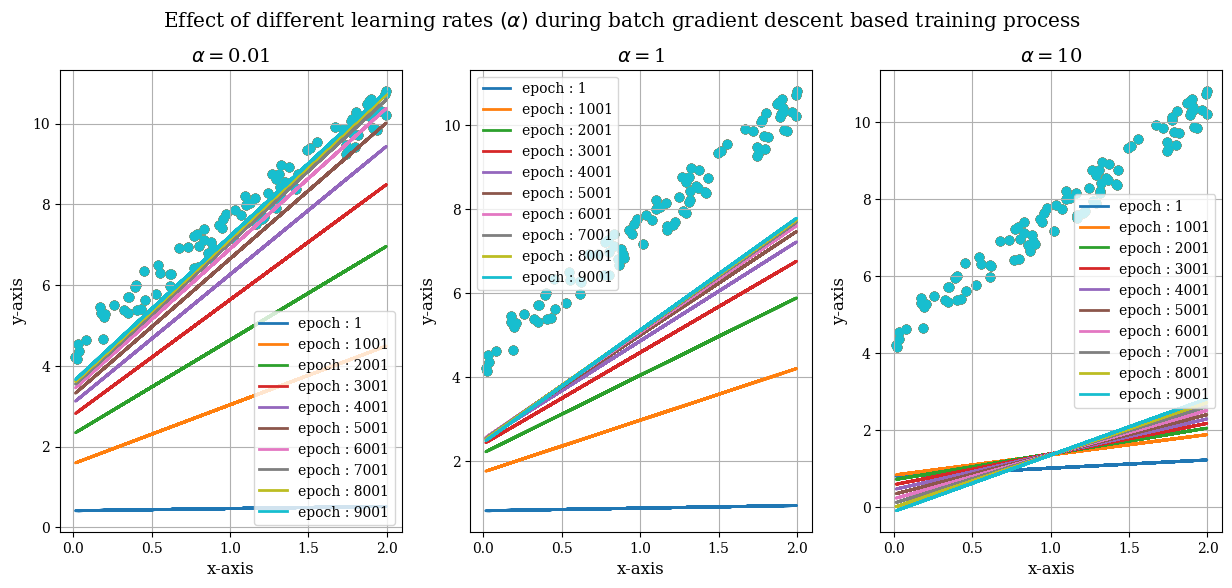

In [217]:
plt.figure(figsize=[15,6])                                      #figure size
alpha_list = [0.01, 1, 10]                                      #regularized parameter alpha list

for i in range(1, 4):
    plt.subplot(1, 3, i)
    fit_and_plot(alpha_list[i-1],10000)
    plt.grid()
    plt.suptitle(r"Effect of different learning rates $(\alpha)$ during batch gradient descent based training process")

## Apply Ridge on polynomial data 

### Generate data for quadratic equation $$ y = ax^2 + bx + c$$

In [218]:
sample_size = 100                                        #define sample size
degree_poly = 2                                          #Order of poly = 2  
x = 6 * np.random.rand(sample_size, 1) - 3
y = 0.5 * x**2 + x + 2 +np.random.randn(sample_size, 1)
x_b = np.c_[np.ones((sample_size, 1)), x, x**2]          #add bias x0 = 1

In [219]:
n_feature = x_b.shape[1]                                                       #number of features
A = np.identity(n_feature)                                                     #identity matix of size n_feature * n_feature
A[0,0] = 0
def fit_and_plot(alpha):
    theta = np.linalg.inv(x_b.T.dot(x_b) + alpha* A).dot(x_b.T).dot(y)          #calculating theta                                 
    y_predict = x_b.dot(theta)                                                  #predict value using theta 
    plt.scatter(x, y_predict)                                                   #plot predicted value
    plt.scatter(x, y)                                                           #plot scatter plot of give input x, y
    plt.xlabel('x-axis')                               
    plt.ylabel('y-axis')                               
    plt.title(r"$\alpha = $" +f'{alpha}')                                        #define plot title
    #plt.legend()                                       
    print(f"Regularized term: {alpha} | Final epoch theta: {theta[0], theta[1]}")


Regularized term: 0.001 | Final epoch theta: (array([1.82129925]), array([0.97523875]))
Regularized term: 100 | Final epoch theta: (array([2.01154792]), array([0.72491028]))
Regularized term: 1000 | Final epoch theta: (array([2.71911037]), array([0.21805587]))


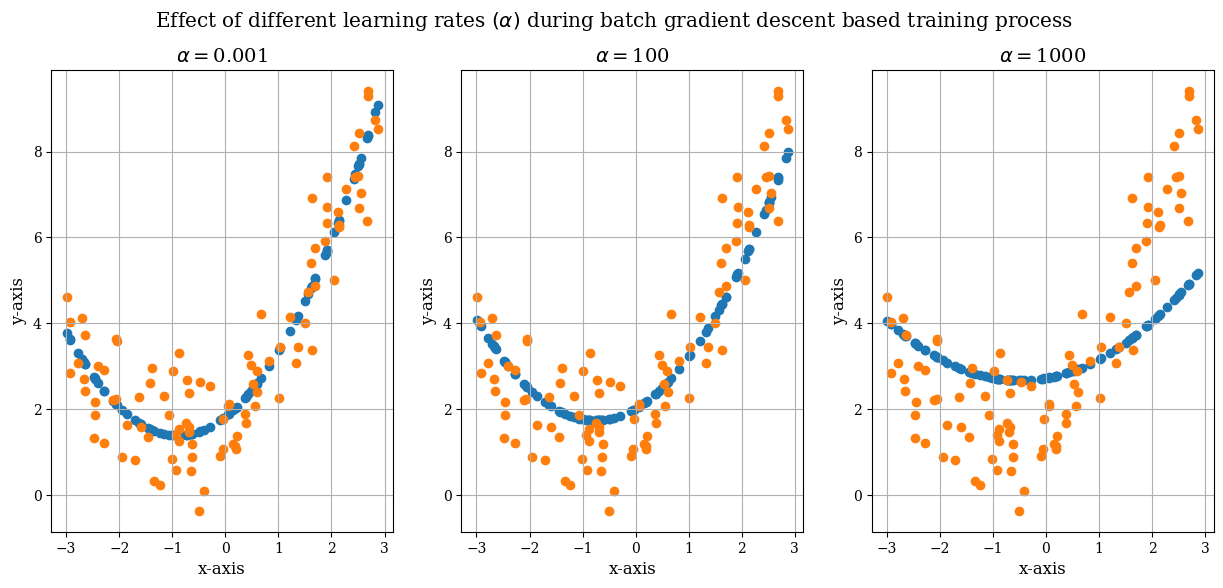

In [220]:
plt.figure(figsize=[15,6])                     #define figsize
alpha_list = [0.001, 100, 1000]                #list of regularized parameter alpha

for i in range(1, 4):
    plt.subplot(1, 3, i)
    fit_and_plot(alpha_list[i-1])
    plt.grid()
    plt.suptitle(r"Effect of different learning rates $(\alpha)$ during batch gradient descent based training process")

### Calculate $\theta^{(next~Step)}$ using gradient descent $$J_{(\theta)} = MSE_{(\theta)} + {\alpha}~\frac{1}{2}~\sum_{i=1}^n\theta_{i}^2$$ $$\theta^{(next~Step)} = \theta - \eta~\nabla_{\theta}~J_{(\theta)} + ~{\alpha}\sum_{i = 1}^n\theta_{i}$$

In [221]:
def fit_and_plot(alpha, n_iteration):
    theta = np.random.rand(3,1)                                                             #Initialize the random theta value
    eta = 0.001                                                                             # learning rate eta is 0.001
    for i in range(n_iteration):
        gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y) + alpha * np.sum(theta)   # calculate gradient and add regularization param
        theta -= eta * gradient                                                             # calculate next theta
        y_predict = x_b.dot(theta)
        if i % 100 == 0:                                                                    # predict value using new theta
            plt.scatter(x, y_predict, label=f"epoch :{i}")
            plt.scatter(x, y)
            plt.xlabel('x-axis')                               
            plt.ylabel('y-axis')                               
            plt.title(r"$\alpha = $" +f'{alpha}')                                            #define plot title
            plt.legend()                                       
    print(f"Regularized term: {alpha} | Final epoch theta: {theta[0], theta[1]}")

Regularized term: 0.01 | Final epoch theta: (array([1.17134326]), array([0.96765708]))
Regularized term: 0.1 | Final epoch theta: (array([1.11309986]), array([0.92626663]))
Regularized term: 1 | Final epoch theta: (array([0.29902384]), array([0.66962315]))


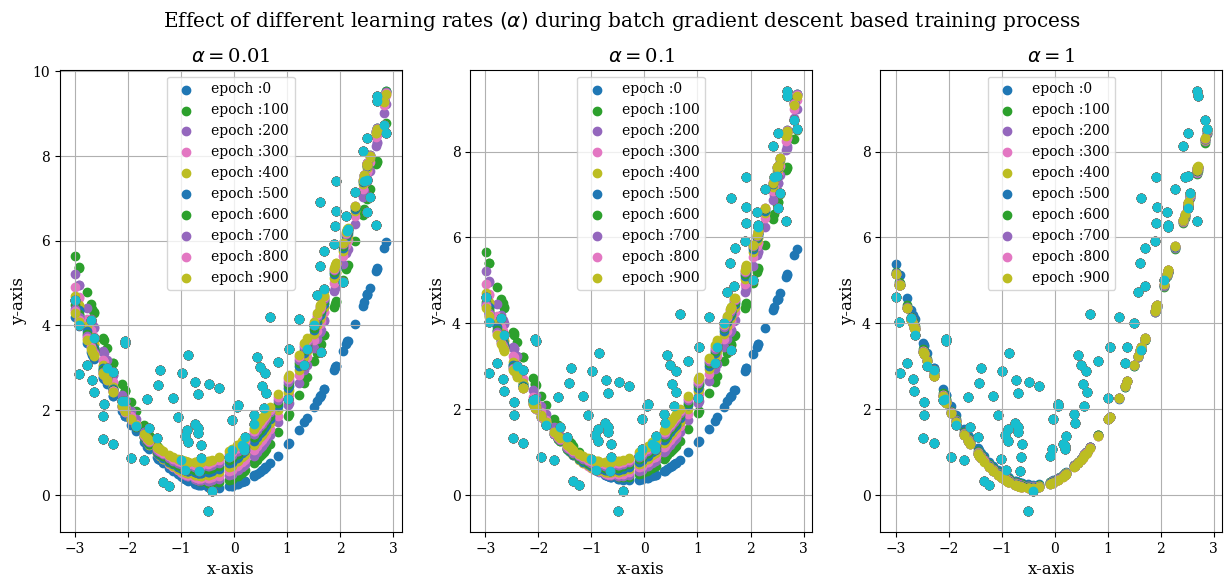

In [222]:
plt.figure(figsize=[15,6])              #define figure size
alpha_list = [0.01, 0.1, 1]             #list of different regularized parameter alpha

for i in range(1, 4):
    plt.subplot(1, 3, i)
    fit_and_plot(alpha_list[i-1],1000)
    plt.grid()
    plt.suptitle(r"Effect of different learning rates $(\alpha)$ during batch gradient descent based training process")

### Calculate $\hat{\theta}$ using sci-kit learn

In [223]:
from sklearn.linear_model import Ridge                 #import ridge regression scikit learn
ridge_reg	= Ridge(alpha=0.01,	solver="cholesky")     # consider regulerization parameter alpha = 0.1
ridge_reg.fit(x, y)                                    
ridge_reg.predict([[0], [2]])
ridge_reg.intercept_, ridge_reg.coef_, 

(array([3.41275843]), array([[0.95478296]]))